In [1]:
from keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

from utils import config, visualization, bigImagesOperations

# Applying segmentation on Sentinel-2 images

## Loading the images

In [2]:
full_2022 = np.load("results/full-small-2022.npy")

(-0.5, 3806.5, 2893.5, -0.5)

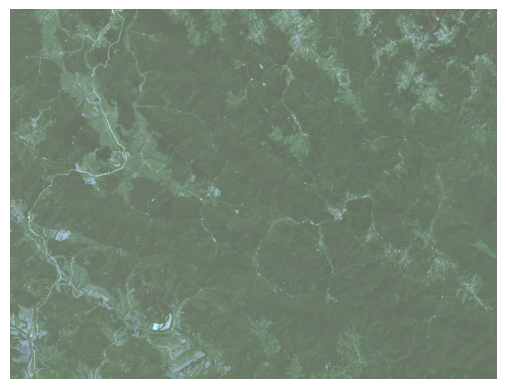

In [17]:
plt.imshow(full_2022/255.)
plt.axis("off")

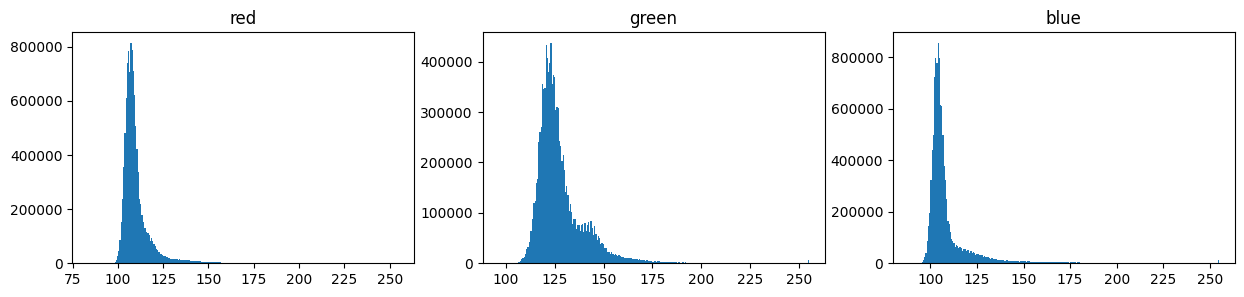

In [18]:
visualization.show_histograms_rgb(full_2022, figsize=(15,3))

(-0.5, 3806.5, 2893.5, -0.5)

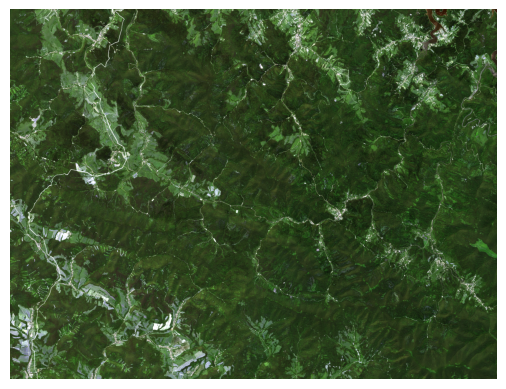

In [7]:
balanced = visualization.histogram_stretching(full_2022, percentile_value=99.5)
plt.imshow(balanced/255.)
plt.axis('off')

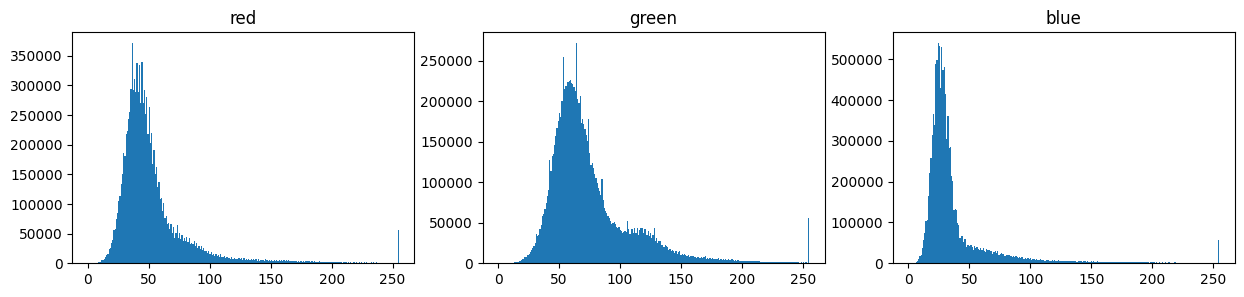

In [20]:
visualization.show_histograms_rgb(balanced, figsize=(15, 3))

### Investigating the training images histograms

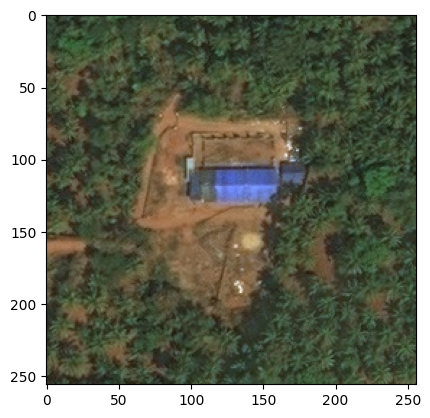

In [6]:
sample_training_image = plt.imread(config.DATASET_DIR + "\\images\\3484_sat_05.jpg")
plt.imshow(sample_training_image)
# plt.axis("off")

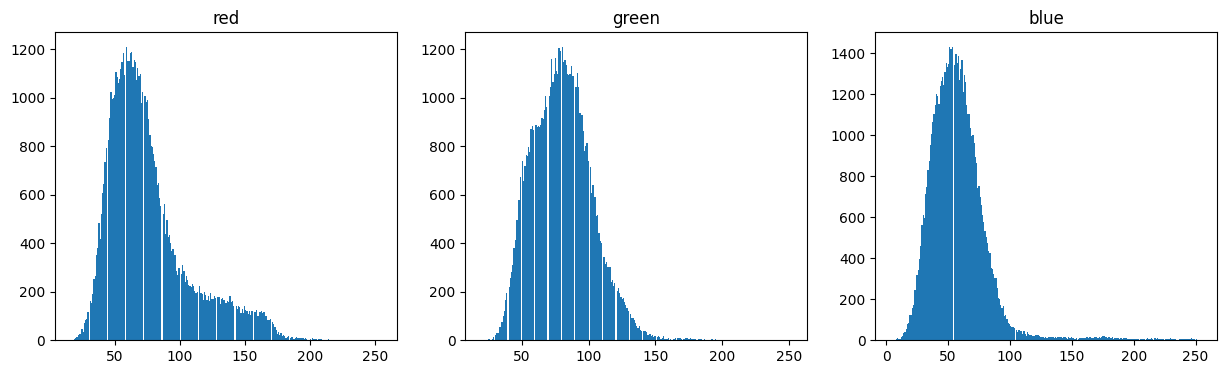

In [7]:
visualization.show_histograms_rgb(sample_training_image)

### Loading an image from India

In [22]:
jatam = np.load("results/jatam-sample.npy")
jatam_balanced = visualization.histogram_stretching(jatam, percentile_value=99.99)

## Applying the pretrained model

In [3]:
trained_model_dir = "trained_models/res2.0-lr0.001-flt32-eph16"
model = load_model(f"{trained_model_dir}/trained-iou63.h5")
model_input_size = (64, 64)

In [ ]:
pred_mask = bigImagesOperations.segment(full_2022, model, model_input_size, white_balance=99)

(-0.5, 3806.5, 2893.5, -0.5)

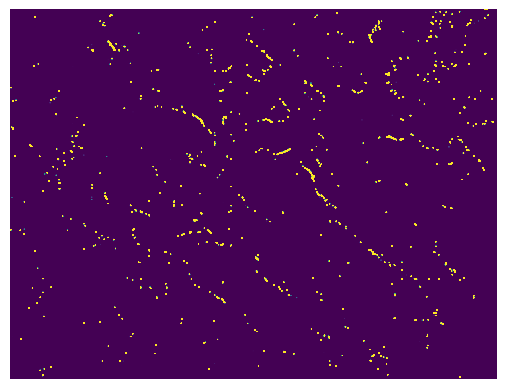

In [5]:
plt.imshow(pred_mask, vmin=0, vmax=0.001)
plt.axis("off")

(-0.5, 3806.5, 2893.5, -0.5)

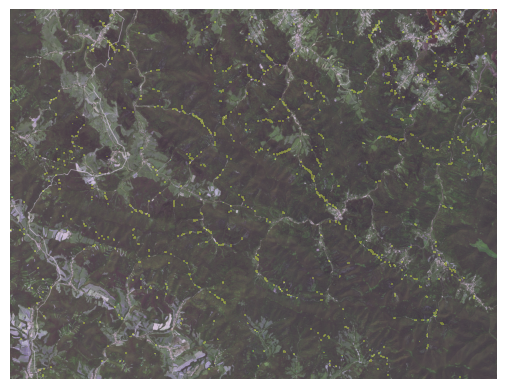

In [8]:
plt.imshow(pred_mask, vmin=0, vmax=0.00001, alpha=0.6)
plt.imshow(balanced/255., alpha=0.6)
plt.axis("off")

## Displaying a sample patch which is the network input

(-0.5, 63.5, 63.5, -0.5)

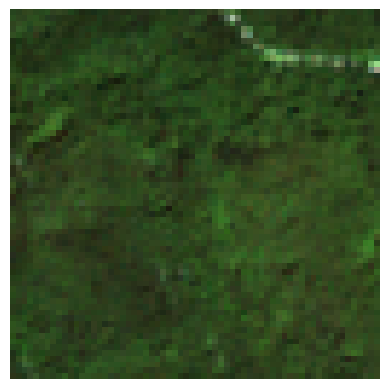

In [14]:
x0 = 2800
y0 = x0

plt.imshow(balanced[x0:x0 + 64, y0:y0 + 64]/255.)
plt.axis("off")